In [26]:
import pandas as pd

unemploymentrate_quarter = pd.read_csv(r'C:\Users\mth2\OneDrive - Gemeente Breda\Bureaublad\Github\uwv\data\80590ned_TypedDataSet_16102024_141924.csv', delimiter=';')
unemploymentrate_quarter = unemploymentrate_quarter.drop(['ID', 'Geslacht', 'Leeftijd'], axis=1)

sickleave_quarter = pd.read_csv(r'C:\Users\mth2\OneDrive - Gemeente Breda\Bureaublad\Github\uwv\data\80072ned_TypedDataSet_16102024_143244.csv', delimiter=';')
sickleave_quarter = sickleave_quarter.drop(['ID', 'BedrijfskenmerkenSBI2008'], axis=1)

merged_df = pd.merge(unemploymentrate_quarter, sickleave_quarter, on = 'Perioden')

merged_df

,Perioden,NietSeizoengecorrigeerd_7,Seizoengecorrigeerd_8,Ziekteverzuimpercentage_1
0,2003KW01,5.8,5.4,5.3
1,2003KW02,5.8,5.8,4.6
2,2003KW03,5.8,6.1,4.1
3,2003KW04,6.2,6.4,4.8
4,2004KW01,7.0,6.6,4.7
...,...,...,...,...
81,2023KW02,3.4,3.5,5.0
82,2023KW03,3.6,3.6,4.8
83,2023KW04,3.4,3.5,5.5
84,2024KW01,3.8,3.7,5.5


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Perioden                   86 non-null     object 
 1   NietSeizoengecorrigeerd_7  86 non-null     float64
 2   Seizoengecorrigeerd_8      86 non-null     float64
 3   Ziekteverzuimpercentage_1  86 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


In [28]:
columns_to_compare = ['Ziekteverzuimpercentage_1', 'NietSeizoengecorrigeerd_7', 'Seizoengecorrigeerd_8']

correlation_matrix = merged_df[columns_to_compare].corr()
print(correlation_matrix)

                           Ziekteverzuimpercentage_1  \
Ziekteverzuimpercentage_1                   1.000000   
NietSeizoengecorrigeerd_7                  -0.605081   
Seizoengecorrigeerd_8                      -0.666669   

                           NietSeizoengecorrigeerd_7  Seizoengecorrigeerd_8  
Ziekteverzuimpercentage_1                  -0.605081              -0.666669  
NietSeizoengecorrigeerd_7                   1.000000               0.990828  
Seizoengecorrigeerd_8                       0.990828               1.000000  


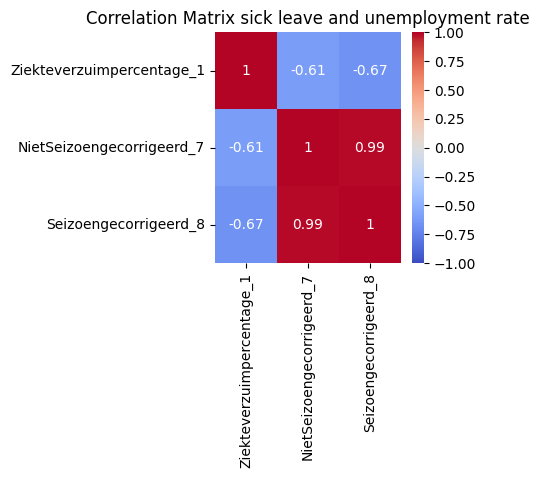

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix sick leave and unemployment rate')
plt.show()

In [30]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the sickleave to the left y-axis
fig.add_trace(
    go.Scatter(
        x=merged_df['Perioden'], 
        y=merged_df['Ziekteverzuimpercentage_1'],
        mode='lines', 
        name='CBS Sick Leave Percentage', 
        line=dict(color='#0078d2'),
        yaxis='y1'
    )
)

# Add the unemploymentrate to the right y-axis
fig.add_trace(
    go.Scatter(
        x=merged_df['Perioden'], 
        y=merged_df['Seizoengecorrigeerd_8'], 
        mode='lines', 
        name='CBS Unemployment rate seasonal', 
        line=dict(color='#ff6b08'),
        yaxis='y2'
    )
)

# Update the layout for two y-axes with customized settings
fig.update_layout(
    title='How Unemployment rates affect Absenteeism',
    xaxis=dict(
        title='Period',
        showgrid=False,
    ),
    yaxis=dict(
        title='Sick Leave Percentage',
        range=[0, 8],
            ),
    yaxis2=dict(
        title='Unemployment rate',
        anchor='x',
        overlaying='y',
        side='right',
        range=[0, 10]
    ),
    legend=dict(
        x=1.1,  # Move the legend to the top-right corner
        y=1.4,
        xanchor='right',
        font=dict(
            family='Arial',
            size=12
        )
    ),
    font=dict(
        family='Arial',
        size=14
    ),
    plot_bgcolor='white',  # Set background color to white
)

# Define the width and height of the plot (adjust as needed)
plot_width = 1000  # Width of the plot in pixels
plot_height = 600  # Height of the plot in pixels

# Show the plot
fig.show()

In [31]:
import statsmodels.api as sm

# Ensure the data types are numeric
merged_df['Seizoengecorrigeerd_8'] = merged_df['Seizoengecorrigeerd_8'].astype(float)
merged_df['Ziekteverzuimpercentage_1'] = merged_df['Ziekteverzuimpercentage_1'].astype(float)

# Add a constant to the independent variable for regression
X = sm.add_constant(merged_df['Seizoengecorrigeerd_8'])

# Fit the ordinary least squares (OLS) model
model = sm.OLS(merged_df['Ziekteverzuimpercentage_1'], X).fit()

# Print the summary of the regression model
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Ziekteverzuimpercentage_1   R-squared:                       0.444
Model:                                   OLS   Adj. R-squared:                  0.438
Method:                        Least Squares   F-statistic:                     67.20
Date:                       Fri, 13 Dec 2024   Prob (F-statistic):           2.44e-12
Time:                               16:54:27   Log-Likelihood:                -49.396
No. Observations:                         86   AIC:                             102.8
Df Residuals:                             84   BIC:                             107.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [32]:
datavoor2008 = merged_df['Perioden'].str.contains('2003') | merged_df['Perioden'].str.contains('2004') | merged_df['Perioden'].str.contains('2005') | merged_df['Perioden'].str.contains('2006') | merged_df['Perioden'].str.contains('2007')
merged_df_vanaf2008 = merged_df[~datavoor2008]
merged_df_vanaf2008

,Perioden,NietSeizoengecorrigeerd_7,Seizoengecorrigeerd_8,Ziekteverzuimpercentage_1
20,2008KW01,5.2,4.8,4.6
21,2008KW02,4.8,4.8,4.0
22,2008KW03,4.5,4.7,3.7
23,2008KW04,4.6,4.7,4.2
24,2009KW01,5.2,4.9,4.5
...,...,...,...,...
81,2023KW02,3.4,3.5,5.0
82,2023KW03,3.6,3.6,4.8
83,2023KW04,3.4,3.5,5.5
84,2024KW01,3.8,3.7,5.5


In [33]:
# Create the figure
fig = go.Figure()

# Add the sickleave to the left y-axis
fig.add_trace(
    go.Scatter(
        x=merged_df_vanaf2008['Perioden'], 
        y=merged_df_vanaf2008['Ziekteverzuimpercentage_1'],
        mode='lines', 
        name='CBS Sick Leave Percentage', 
        line=dict(color='#0078d2'),
        yaxis='y1'
    )
)

# Add the unemploymentrate to the right y-axis
fig.add_trace(
    go.Scatter(
        x=merged_df_vanaf2008['Perioden'], 
        y=merged_df_vanaf2008['Seizoengecorrigeerd_8'], 
        mode='lines', 
        name='CBS Unemployment rate seasonal', 
        line=dict(color='#ff6b08'),
        yaxis='y2'
    )
)

# Update the layout for two y-axes with customized settings
fig.update_layout(
    title='How Unemployment rates affect Absenteeism',
    xaxis=dict(
        title='Period',
        showgrid=True,
    ),
    yaxis=dict(
        title='Sick Leave Percentage',
        range=[0, 8],
            ),
    yaxis2=dict(
        title='Unemployment rate',
        anchor='x',
        overlaying='y',
        side='right',
        range=[0, 10]
    ),
    legend=dict(
        x=1.1,  # Move the legend to the top-right corner
        y=1.4,
        xanchor='right',
        font=dict(
            family='Arial',
            size=12
        )
    ),
    font=dict(
        family='Arial',
        size=14
    ),
    plot_bgcolor='white',  # Set background color to white
)

# Define the width and height of the plot (adjust as needed)
plot_width = 1000  # Width of the plot in pixels
plot_height = 600  # Height of the plot in pixels

# Show the plot
fig.show()